TUGAS BESAR IF2220 PROBABILITAS DAN STATISTIKA

PENARIKAN KESIMPULAN DAN PENGUJIAN HIPOTESIS


KEVIN RONI 13520114

YOSEPH ALEXANDER SIREGAR 13520141

In [4]:
#IMPORT MODULE & LOAD CSV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

df = pd.read_csv('water_potability.csv', header=None)
df.columns = ["iD", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potabilty"]
df

,iD,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potabilty
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


#### 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [5]:
df1 = df.drop(columns=["iD", "Potabilty"])
stats = pd.DataFrame()
stats["Mean"] = df1.mean()
stats["Median"] = df1.median()
stats["Standard Deviation"] = df1.std()
stats["Variance"] = df1.var()
stats["Range"] = df1.max() - df1.min()
stats["Min"] = df1.min()
stats["Max"] = df1.max()
stats["Q1"] = df1.quantile(0.25)
stats["Q3"] = df1.quantile(0.75)
stats["IQR"] = stats["Q3"] - stats["Q1"]
stats["Skewness"] = df1.skew()
stats["Kurtosis"] = df1.kurt()
stats

,Mean,Median,Standard Deviation,Variance,Range,Min,Max,Q1,Q3,IQR,Skewness,Kurtosis
pH,7.087193,7.029490,1.572803,2.473709e+00,13.772501,0.227499,14.000000,6.090785,8.053006,1.962221,0.048535,0.626904
Hardness,195.969209,197.203525,32.643166,1.065576e+03,243.845890,73.492234,317.338124,176.740657,216.447589,39.706932,-0.085321,0.525480
Solids,21904.673439,20926.882155,8625.397911,7.439749e+07,56167.729801,320.942611,56488.672413,15614.412962,27170.534649,11556.121687,0.591011,0.337320
Chloramines,7.134322,7.142014,1.585214,2.512904e+00,11.736129,1.390871,13.127000,6.138326,8.109933,1.971607,0.013003,0.549782
Sulfate,333.211376,332.214113,41.211111,1.698356e+03,352.030642,129.000000,481.030642,307.626986,359.268147,51.641161,-0.045728,0.786854
Conductivity,426.476708,423.438372,80.701872,6.512792e+03,551.722883,201.619737,753.342620,366.619219,482.209772,115.590553,0.268012,-0.237206
OrganicCarbon,14.357940,14.323286,3.325770,1.106075e+01,24.806707,2.200000,27.006707,12.122530,16.683562,4.561031,-0.020220,0.031018
Trihalomethanes,66.400717,66.482041,16.081109,2.586021e+02,115.422987,8.577013,124.000000,55.949993,77.294613,21.344620,-0.051383,0.223017
Turbidity,3.969497,3.967374,0.780471,6.091350e-01,5.044749,1.450000,6.494749,3.442882,4.514663,1.071781,-0.032266,-0.049831


### 2. Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

a. Kolom PH

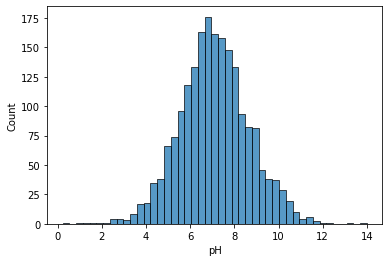

In [9]:
sns.histplot(data = df["pH"])
plt.show()

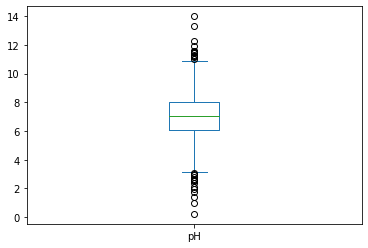

In [8]:
df["pH"].plot(kind="box")
plt.show()

b. Kolom Hardness

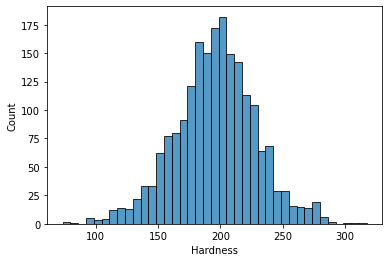

In [16]:
sns.histplot(data = df["Hardness"])
plt.show()

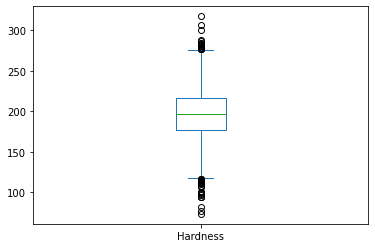

In [17]:
df["Hardness"].plot(kind="box")
plt.show()

c. Kolom Solids

In [ ]:
sns.histplot(data = df["Solids"])

In [ ]:
df["Solids"].plot(kind="box")

d. Kolom Chloramines

In [ ]:
sns.histplot(data = df["Chloramines"])

In [ ]:
df["Chloramines"].plot(kind="box")

e. Kolom Sulfate

In [ ]:
sns.histplot(data = df["Sulfate"])

In [ ]:
df["Sulfate"].plot(kind="box")

f. Kolom Conductivity

In [ ]:
sns.histplot(data = df["Conductivity"])

In [ ]:
df["Conductivity"].plot(kind="box")

g. Kolom OrganicCarbon

In [ ]:
sns.histplot(data = df["OrganicCarbon"])

In [ ]:
df["OrganicCarbon"].plot(kind="box")

h. Kolom Trihalomethanes

In [ ]:
sns.histplot(data = df["Trihalomethanes"])

<AxesSubplot:>

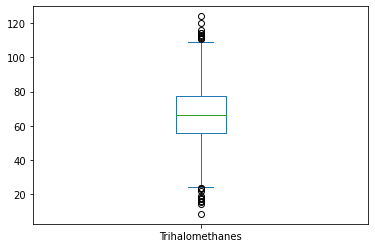

In [21]:
df["Trihalomethanes"].plot(kind="box")

i. Kolom Turbidity

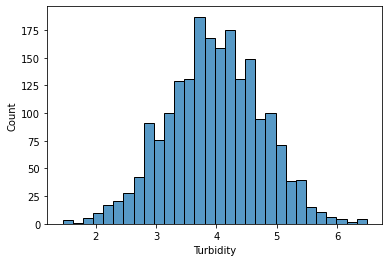

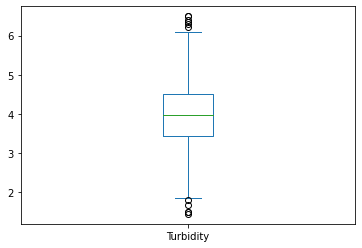

In [30]:
sns.histplot(data = df["Turbidity"])
plt.show()

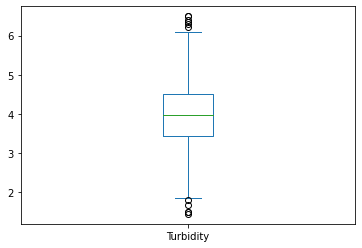

In [31]:
df["Turbidity"].plot(kind="box")
plt.show()

#### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

In [34]:
def normality_test(data):
    stat, p_value = stats.shapiro(data)
    print("Shapiro-Wilk Test:")
    print("Statistics=%.3f, p=%.3f" % (stat, p_value))

normality_test(df["pH"])

NameError: name 'shapiro' is not defined